<a href="https://colab.research.google.com/github/Adithiyanpv/LIP-READING/blob/main/CH_EN_U4AIE22003_ADITHIYAN_PV_DL_LAB_TASKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CH.EN.U4AIE22003
ADITHIYAN PV
22AIE304 - DEEP LEARNING
LAB TASKS

Lab - 1 : Implementation of Perceptron from scratch

In [2]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder

In [4]:
import zipfile
import pandas as pd

# Path to your ZIP file
zip_file_path = "/content/drive/MyDrive/credit+approval (1).zip"

# List the files in the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())  # This will list all files in the ZIP archive

# Now, read the specific CSV file from the ZIP
csv_file_name = "crx.data"  # Replace this with the correct file name if needed
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f, header=None)

# Display the first few rows of the DataFrame
print(df.head())


['Index', 'credit.lisp', 'credit.names', 'crx.data', 'crx.names']
  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


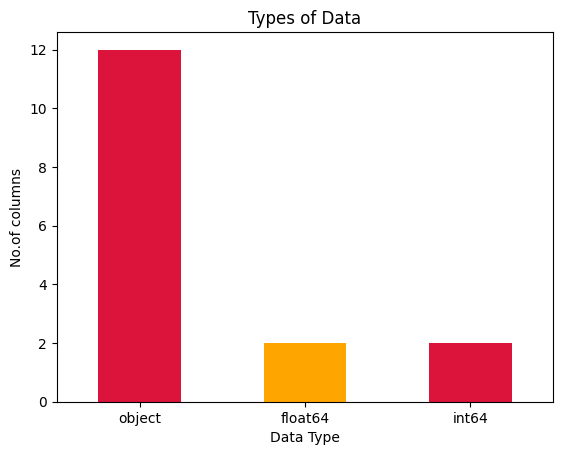

In [6]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

In [7]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [8]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

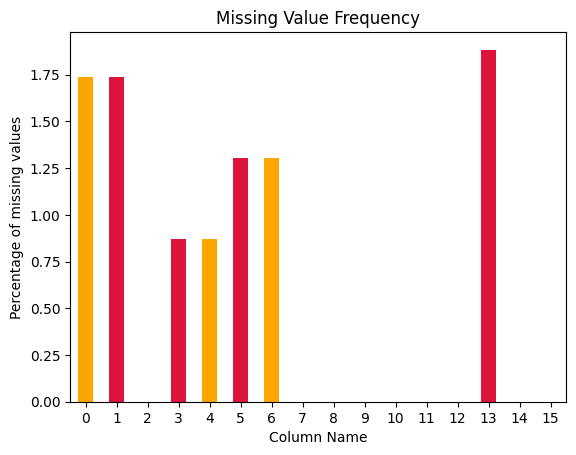

In [9]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

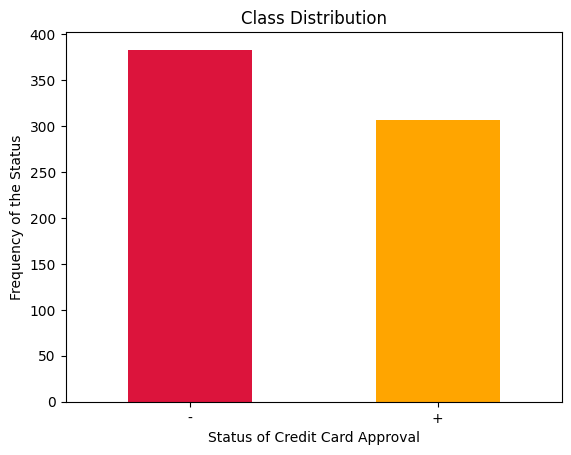

In [10]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

In [11]:
df = df.replace({"?":None})
df = df.dropna()

In [12]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))
df = df.reset_index()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

In [14]:
X_train

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
436,459,1.0,0.0,0.290,0.0,0.0,0.0,0.0,1.500,0.0,1.0,0,1.0,0.0,1.0,0
75,76,1.0,0.0,6.500,0.0,0.0,1.0,1.0,0.125,0.0,0.0,0,1.0,0.0,1.0,0
55,55,0.0,0.0,11.625,0.0,0.0,0.0,0.0,0.835,0.0,0.0,0,1.0,0.0,1.0,300
49,49,0.0,0.0,0.665,0.0,0.0,1.0,0.0,0.165,0.0,1.0,0,1.0,1.0,1.0,0
589,623,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.665,0.0,1.0,0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9,0.0,0.0,4.915,0.0,0.0,0.0,0.0,3.165,0.0,0.0,0,1.0,0.0,1.0,1442
359,377,1.0,0.0,0.835,0.0,0.0,0.0,0.0,2.000,0.0,1.0,0,1.0,0.0,0.0,0
192,197,0.0,0.0,7.625,0.0,0.0,1.0,0.0,15.500,0.0,0.0,12,0.0,1.0,1.0,790
629,665,1.0,0.0,0.040,0.0,0.0,0.0,0.0,0.040,0.0,1.0,0,1.0,1.0,1.0,0


In [15]:
class Perceptron:

    # Initialising the required parameters for the perceptron.
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function.
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0

    # The model training or fitting by updating weights.
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)

    # Predicting on a single instance.
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))

    # Predicting on a larger number of instances and returning accuracy.
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

In [16]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

In [17]:
p.fit()

In [18]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([48.48484848])

In [19]:
p.test(X,y)

array([73.59454855])

In [20]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

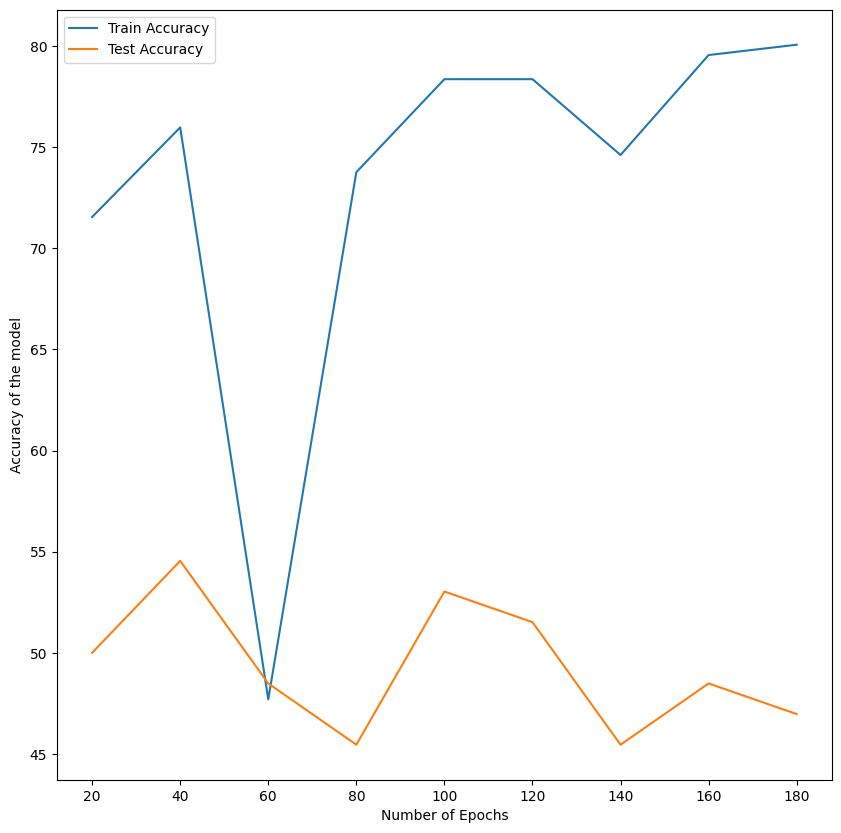

In [21]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()

In [22]:
tuning = pd.DataFrame({"epochs":np.array(epochs).squeeze(),"train accuracy":np.array(train_acc).squeeze(), "test accuracy":np.array(test_acc).squeeze()})


In [23]:
def diff(row):
    return row[1] - row[2]
tuning["Difference"] = tuning.apply(diff,axis=1)
tuning.sort_values(by="Difference")

,epochs,train accuracy,test accuracy,Difference
2,60,47.700170,48.484848,-0.784678
1,40,75.979557,54.545455,21.434103
0,20,71.550256,50.000000,21.550256
4,100,78.364566,53.030303,25.334263
5,120,78.364566,51.515152,26.849414
3,80,73.764906,45.454545,28.310361
6,140,74.616695,45.454545,29.162150
7,160,79.557070,48.484848,31.072221
8,180,80.068143,46.969697,33.098446


Lab-2: Multilayer Perceptron and Hyperparameter Tuning

In [24]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Modules used for Machine Learning models.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Suppressing the warnings.
import warnings
warnings.filterwarnings('ignore')

In [26]:
import zipfile
import pandas as pd

# Path to your ZIP file
zip_file_path = "/content/drive/MyDrive/credit+approval (1).zip"

# List the files in the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())  # This will list all files in the ZIP archive

# Now, read the specific CSV file from the ZIP
csv_file_name = "crx.data"  # Replace this with the correct file name if needed
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f, header=None)

# Display the first few rows of the DataFrame
print(df.head())


['Index', 'credit.lisp', 'credit.names', 'crx.data', 'crx.names']
  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


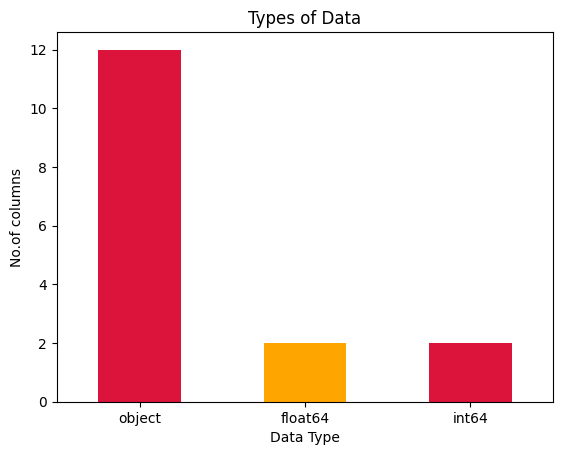

In [28]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

In [29]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [30]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

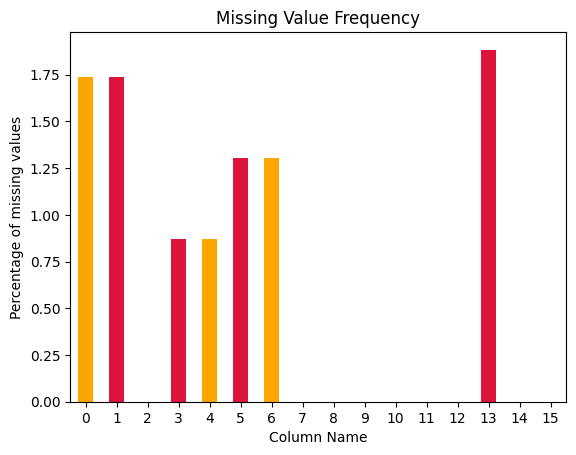

In [31]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

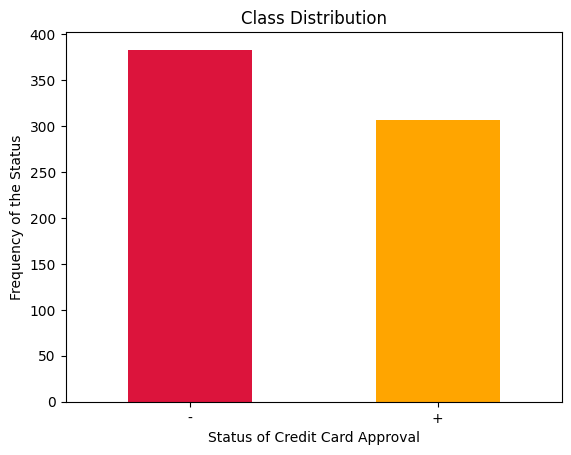

In [32]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

In [33]:
df = df.replace({"?":None})
df = df.dropna()

In [34]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))
df = df.reset_index()

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

In [37]:
clf = Perceptron(random_state=0)

In [39]:
X_train.columns = X_train.columns.astype(str)
clf.fit(X_train, y_train)


Perceptron()

In [41]:
# Ensure that both X_train and X_test have consistent column names (all strings)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Perform predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


In [42]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.676320272572402

In [43]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7575757575757576

In [44]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [45]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [46]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8909710391822828

In [47]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.803030303030303

In [50]:
import pandas as pd
import zipfile

# Specify the ZIP file path
zip_file_path = "/content/drive/MyDrive/adult.zip"
csv_file_name = "adult.data"  # Replace with the correct file name you want to read

# Read the specific CSV file from the ZIP
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        adult = pd.read_csv(f, header=None)

# Display the first few rows of the DataFrame
print(adult.head())


   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [51]:
adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


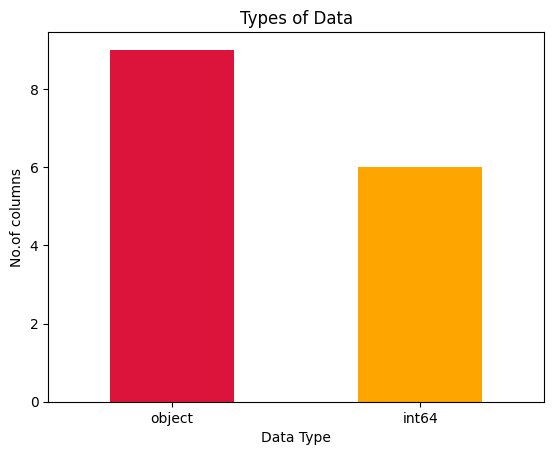

In [52]:
adult.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

In [53]:
cat_cols = []
num_cols = []

for i in adult.columns:
    if adult[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [54]:
null_freq = []
for i in adult.columns:
    f = dict(adult[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(adult))
    else:
        null_freq.append(0)

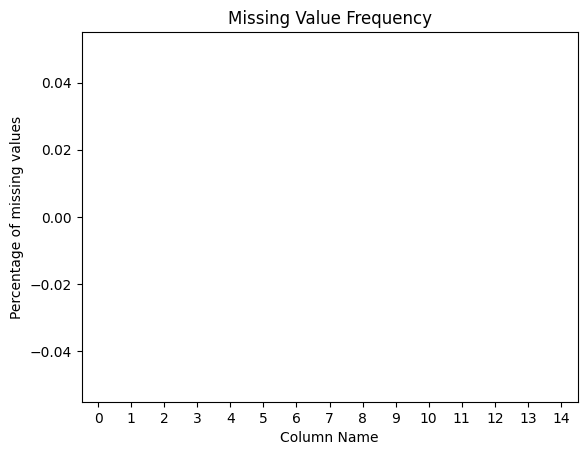

In [55]:
pd.Series(dict(zip(adult.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

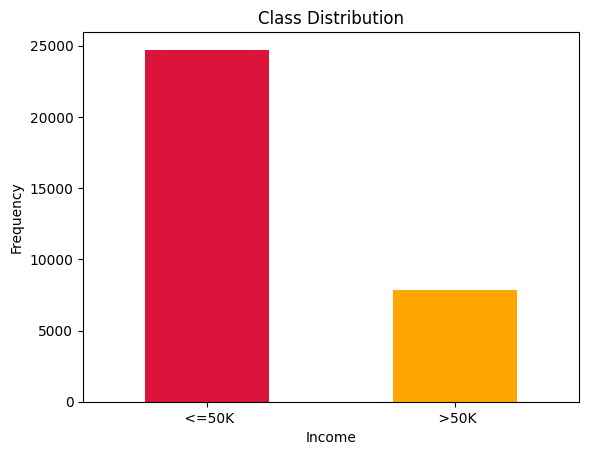

In [56]:
adult[14].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Income",
                           ylabel="Frequency",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

In [57]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    adult[i] = encoder.fit_transform(adult[i].values.reshape(-1,1))
adult = adult.reset_index()

In [58]:
X_train,X_test,y_train,y_test = train_test_split(adult,
    adult[14],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(14)
X_test.pop(14)

22278    1.0
8950     1.0
7838     1.0
16505    1.0
19140    0.0
        ... 
8955     0.0
7273     1.0
6269     1.0
3760     0.0
28061    1.0
Name: 14, Length: 3257, dtype: float64

In [60]:
# Ensure that all column names are strings in both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
from sklearn.neural_network import MLPClassifier

# Initialize and fit the MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=1)

In [61]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [62]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.800982800982801

In [63]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7909118821000921

In [64]:
search_space = {
    "activation":["relu","tanh"],
    "solver":["sgd","adam"],
    "learning_rate":["invscaling","constant"]
}

In [65]:
gs = GridSearchCV(clf, search_space)
gs.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=300, random_state=1),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['invscaling', 'constant'],
                         'solver': ['sgd', 'adam']})

In [66]:
gs.best_score_

0.7848418044189829

In [67]:
gs.best_params_

{'activation': 'relu', 'learning_rate': 'invscaling', 'solver': 'adam'}

In [68]:
rs = RandomizedSearchCV(clf, search_space)
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=MLPClassifier(max_iter=300, random_state=1),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'learning_rate': ['invscaling',
                                                          'constant'],
                                        'solver': ['sgd', 'adam']})

In [69]:
rs.best_score_

0.7848418044189829

In [70]:
rs.best_params_

{'solver': 'adam', 'learning_rate': 'invscaling', 'activation': 'relu'}

In [71]:
clf = MLPClassifier(random_state=1, max_iter=300, solver="adam",learning_rate="invscaling",activation="tanh").fit(X_train, y_train)


In [72]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [73]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.77996177996178

In [74]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7712618974516426

In [77]:
from sklearn.model_selection import cross_val_score
adult.columns = adult.columns.astype(str)

# Perform cross-validation
score_lr = cross_val_score(clf, adult.drop(['14'], axis=1), adult['14'], cv=10)
print(score_lr)
print("Avg:", np.average(score_lr))


[0.7712619  0.76535627 0.77487715 0.76934889 0.76781327 0.76658477
 0.76996314 0.76658477 0.76781327 0.76597052]
Avg: 0.7685573936763682


Lab-3: Hyperparameter Tuning using GridSearch and RandomSearch

In [78]:
# Modules used for data handling.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Module used for test-train split
from sklearn.model_selection import train_test_split

# Modules used for multilayer perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Modules used for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd
import zipfile

# Specify the ZIP file path
zip_file_path = "/content/drive/MyDrive/adult.zip"
csv_file_name = "adult.data"  # Replace with the correct file name you want to read

# Read the specific CSV file from the ZIP
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        adult = pd.read_csv(f, header=None)

# Display the first few rows of the DataFrame
print(adult.head())


   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [81]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


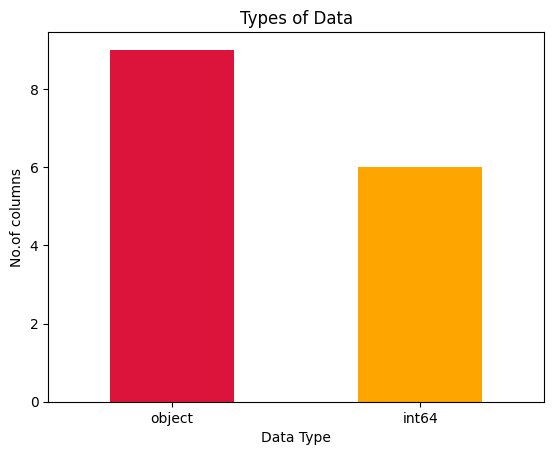

In [83]:
adult.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

In [84]:
cat_cols = []
num_cols = []

for i in adult.columns:
    if adult[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [85]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    adult[i] = encoder.fit_transform(adult[i].values.reshape(-1,1))
adult = adult.reset_index()

In [86]:
X_train,X_test,y_train,y_test = train_test_split(adult,
    adult[14],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(14)
X_test.pop(14)

22278    1.0
8950     1.0
7838     1.0
16505    1.0
19140    0.0
        ... 
8955     0.0
7273     1.0
6269     1.0
3760     0.0
28061    1.0
Name: 14, Length: 3257, dtype: float64

In [88]:
# Ensure that all column names are strings in both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
from sklearn.neural_network import MLPClassifier

# Initialize and fit the MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=1)

In [89]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [90]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.800982800982801

In [91]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7909118821000921

In [92]:
search_space = {
    "activation":["relu","tanh"],
    "solver":["sgd","adam"],
    "learning_rate":["invscaling","constant"]
}
gs = GridSearchCV(MLPClassifier(), search_space)
gs.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['invscaling', 'constant'],
                         'solver': ['sgd', 'adam']})

In [93]:
gs.best_score_

0.7809509903201179

In [94]:
gs.best_params_

{'activation': 'tanh', 'learning_rate': 'invscaling', 'solver': 'adam'}

In [95]:
search_space = {
    "activation":["relu","tanh","identity","logistic"],
    "solver":["sgd","adam","lbfgs"],
    "learning_rate":["invscaling","constant","adaptive"],
    "early_stopping":[True, False]
}

In [96]:
rs = RandomizedSearchCV(MLPClassifier(), search_space)
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'identity', 'logistic'],
                                        'early_stopping': [True, False],
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']})

In [97]:
rs.best_score_

0.7962733997448279

In [98]:
rs.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'early_stopping': True,
 'activation': 'identity'}

In [99]:
clf = MLPClassifier(activation="relu",learning_rate="constant",solver="adam")


In [100]:
clf.fit(X_train, y_train)


MLPClassifier()

In [101]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [102]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)


0.7946355446355446

In [103]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)


0.7878415719987719

Lab - 4 : MLP Implementation using Keras on MNIST



In [105]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from numpy import expand_dims

# Modules used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Module used to perform random choice from an iterable.
import random as r

# Modules used to build the MLP architecture
import tensorflow.keras as tk
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Module used for data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set_style()


In [106]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [107]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


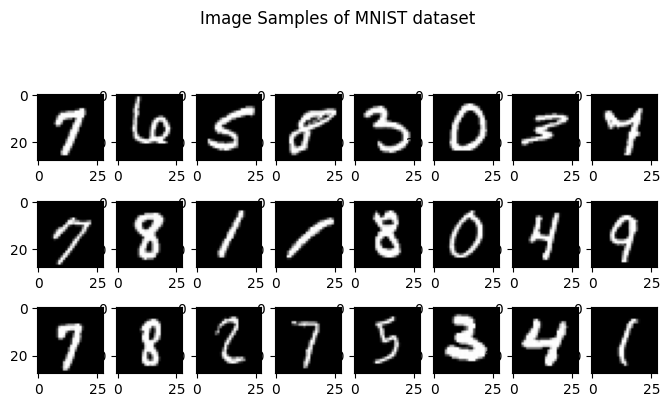

In [108]:
rows = 3
columns = 8
fig, axs = plt.subplots(rows, columns,figsize=(8,8))
for i in range(rows):
    for j in range(columns):
        axs[i,j].imshow(r.choice(x_train),cmap='gray')
fig.suptitle("Image Samples of MNIST dataset")
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
plt.show()

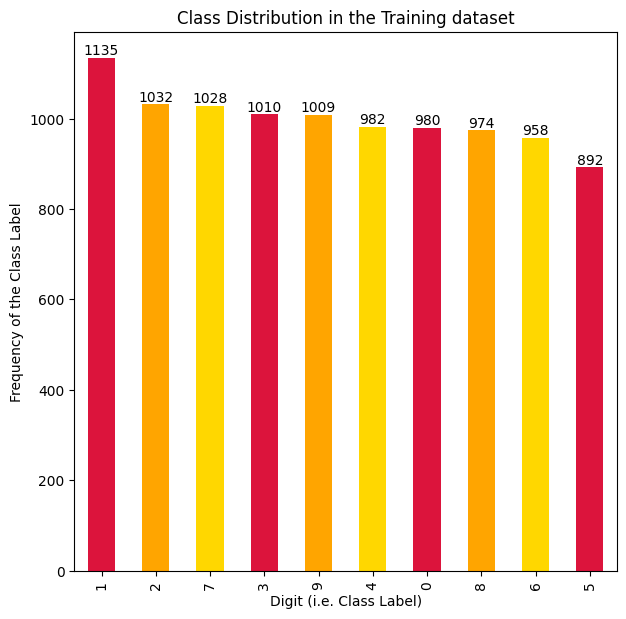

In [109]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["crimson","orange","gold"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [110]:
class ImageDataAugmentation:

    def __init__(self, x_train, y_train, x_test, y_test, rotation_range, width_shift, height_shift, shear_range, zoom_range):
            self.x_train = x_train
            self.y_train = y_train
            self.x_test = x_test
            self.y_test = y_test
            self.rotation_range = rotation_range
            self.width_shift = width_shift
            self.height_shift = height_shift
            self.shear_range = shear_range
            self.zoom_range = zoom_range

    def fit_generator(self):
        self.datagen = ImageDataGenerator(rotation_range=self.rotation_range,
                                          width_shift_range=self.width_shift,
                                          height_shift_range=self.height_shift,
                                          zoom_range=self.zoom_range)
        self.datagen.fit(self.x_train.reshape(x_train.shape[0], 28, 28, 1))

    def display_samples(self, rows : int, cols : int):
        num = rows*cols
        fig, ax = plt.subplots(rows, cols, figsize=(8,8))
        self.x = self.datagen.flow(self.x_train.reshape(self.x_train.shape[0], 28, 28, 1),
                     self.y_train.reshape(self.y_train.shape[0], 1),
                     batch_size=num,
                     shuffle=False)
        for X, Y in self.x:
            for i in range(num):
                axis = ax[i//cols, i%cols]
                axis.imshow(X[i].reshape(28,28), cmap='gray')
                axis.set_title('Label: {}'.format(int(Y[i])))
            break
        plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0.1)
        fig.suptitle("Image Samples of MNIST dataset after Augmentation")
        plt.show()

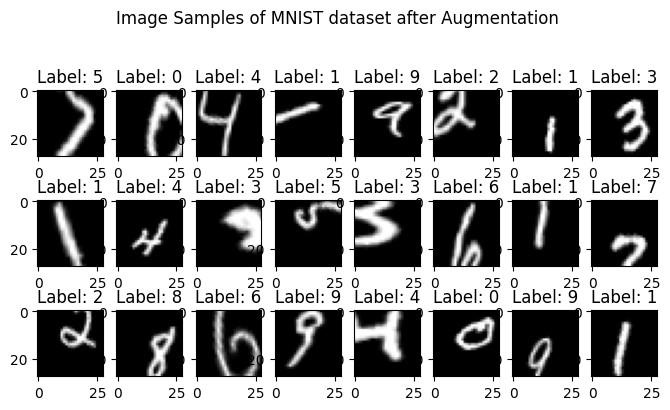

In [111]:
ida = ImageDataAugmentation(x_train, y_train, x_test, y_test, 30, 0.25, 0.25, 45, [0.5, 1.5])
ida.fit_generator()
ida.display_samples(3,8)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 7ms/step - loss: 4.0630 - accuracy: 0.9068 - val_loss: 0.8007 - val_accuracy: 0.9437
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.9556 - val_loss: 0.5725 - val_accuracy: 0.9513
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2856 - accuracy: 0.9669 - val_loss: 0.4626 - val_accur

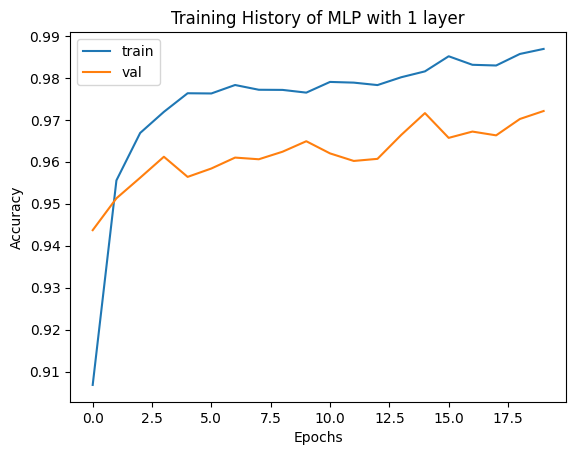

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.7419 - accuracy: 0.8653 - val_loss: 0.3471 - val_accuracy: 0.9115
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2723 - accuracy: 0.9295 - val_loss: 0.2770 - val_accuracy: 0.936

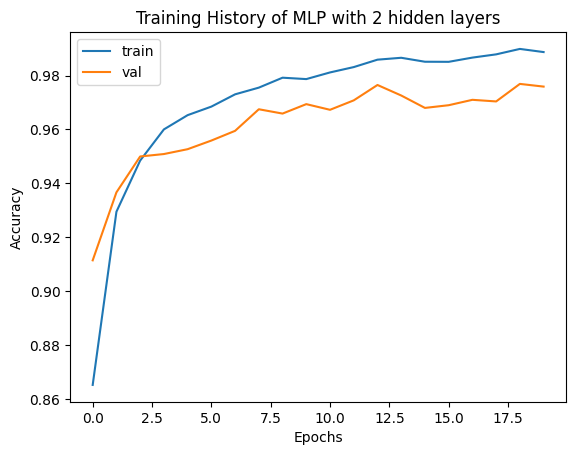

In [146]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

class ModelBuilding:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test

    def preprocess_data(self):
        # Reshape your data
        self.X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1]*self.X_train.shape[2])
        self.X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1]*self.X_test.shape[2])
        self.Y_train = to_categorical(self.Y_train, 10)
        self.Y_test = to_categorical(self.Y_test, 10)
        self.output_dim = 10
        self.input_dim = self.X_train.shape[1]
        self.batch_size = 128
        self.nb_epoch = 20

    def build_model_1_layers(self):
        # Build a model with 1 hidden layer
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()

    def build_model_2_layers(self):
        # Build a model with 2 hidden layers
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()

    def train_model(self):
        # Train the model
        self.history = self.model.fit(self.X_train, self.Y_train,
                                      batch_size=self.batch_size,
                                      epochs=self.nb_epoch, verbose=1,
                                      validation_data=(self.X_test, self.Y_test))

    def plot_history(self, title):
        # Plot training & validation accuracy values
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

    def evaluate_model(self):
        # Evaluate the model
        test_loss, test_accuracy = self.model.evaluate(self.X_test, self.Y_test, verbose=0)
        print("Test Dataset Loss: ", test_loss)
        print("Test Dataset Accuracy: ", test_accuracy)

# Example usage
m = ModelBuilding(x_train, y_train, x_test, y_test)
m.preprocess_data()

# Model with one layer
m.build_model_1_layers()
m.train_model()
m.plot_history("Training History of MLP with 1 layer")

# Model with two layers
m.build_model_2_layers()
m.train_model()
m.plot_history("Training History of MLP with 2 hidden layers")


Lab - 5 : CNN Implementation using Keras on MNIST dataset

In [121]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical  # Updated import for one-hot encoding

# Module used for random choice from an iterable.
import random as r

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Module used for loading MNIST dataset
from tensorflow.keras.datasets import mnist

# Module used for building the CNN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

# Module used for early stopping callback
import tensorflow as tf

# Module used for suppressing warning
import warnings
warnings.filterwarnings('ignore')


In [122]:
def preprocess_data(self):
    # Reshape your data if needed
    self.X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1]*self.X_train.shape[2])
    self.X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1]*self.X_test.shape[2])

    # Use to_categorical instead of np_utils.to_categorical
    self.Y_train = to_categorical(self.Y_train, 10)
    self.Y_test = to_categorical(self.Y_test, 10)

    # Define output dimension
    self.output_dim = 10


In [123]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [124]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

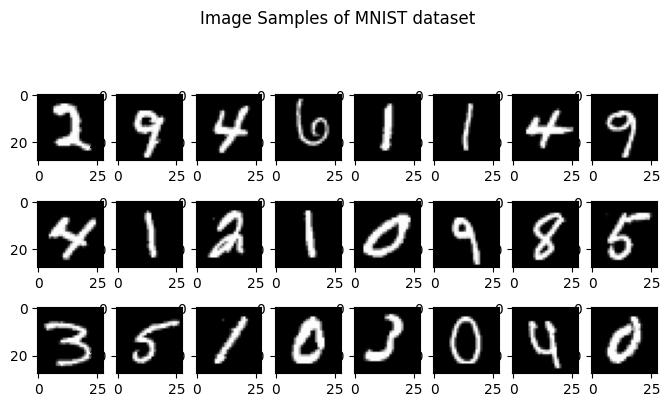

In [125]:
rows = 3
columns = 8
fig, axs = plt.subplots(rows, columns,figsize=(8,8))
for i in range(rows):
    for j in range(columns):
        axs[i,j].imshow(r.choice(x_train),cmap='gray')
fig.suptitle("Image Samples of MNIST dataset")
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
plt.show()

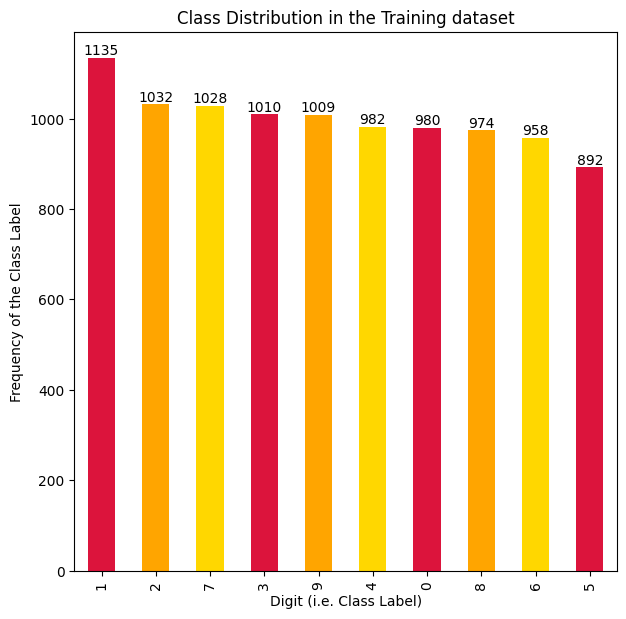

In [126]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["crimson","orange","gold"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [127]:
class CNN:

    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test  = x_test
        self.y_test  = y_test
        self.model = None
        self.history = None
        self.x_train_dim = None
        self.y_train_dim = None
        self.INPUT_SHAPE = (28,28,1)
        self.OUTPUT_SHAPE = 10

    def __get_expected_shape(self, data):
        return (data.shape[0], data.shape[1], data.shape[2], 1)

    def preprocess_data(self):
        self.x_train_dim = self.__get_expected_shape(self.x_train)
        self.x_test_dim = self.__get_expected_shape(self.x_test)
        self.x_train = self.x_train.reshape(self.x_train_dim)
        self.x_test  = self.x_test.reshape(self.x_test_dim)
        self.y_train = np_utils.to_categorical(self.y_train, 10)
        self.y_test  = np_utils.to_categorical(self.y_test, 10)

    def __add_dense_layer(self, units : int, activation : str):
        self.model.add(Dense(units,
                             activation=activation))

    def build_model(self):
        self.model=Sequential()
        self.model.add(Conv2D(320,(3,3),
                       activation='relu',
                       input_shape=self.INPUT_SHAPE))
        self.model.add(MaxPool2D(2,2))
        self.model.add(Flatten())
        self.__add_dense_layer(100, "relu")
        self.__add_dense_layer(self.OUTPUT_SHAPE, "softmax")
        self.model.summary()
        self.model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

    def fit_model(self):
        self.history = self.model.fit(self.x_train,
                                      self.y_train,
                                      epochs=20,
                                      batch_size=32,
                                      verbose=1,
                                      validation_data=(self.x_test, self.y_test),
                                      callbacks=[ # this will prevent the model from overfitting
                                      tf.keras.callbacks.EarlyStopping(
                                        monitor='val_loss',
                                        patience=3,
                                        restore_best_weights=True)
                                      ])

    def plot_history(self,title):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

    def evaluate_model(self):
        print("Test Dataset Loss: ", self.history.history['val_loss'])
        print("Test Dataset Accuracy: ",self.history.history['val_accuracy'])

In [128]:
mnist_cnn = CNN(x_train, y_train, x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 20s 8ms/step - loss: 0.2170 - accuracy: 0.9334 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0806 - accuracy: 0.9768 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0289 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0235 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0220 - val_accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0268 - val_accuracy

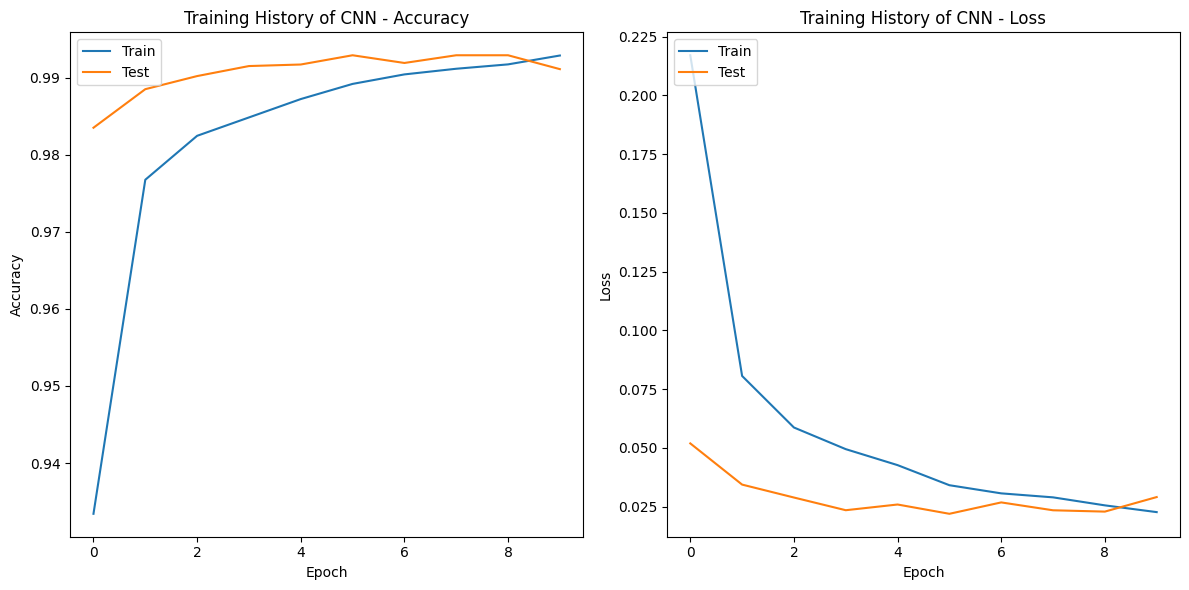

In [140]:
import matplotlib.pyplot as plt

class ModelBuilding:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

        # Assuming you need these dimensions for reshaping
        self.x_train_dim = (self.x_train.shape[0], 28, 28, 1)  # Adding channel dimension
        self.x_test_dim = (self.x_test.shape[0], 28, 28, 1)  # Adding channel dimension

        # Initialize model
        self.model = None
        self.history = None

    def preprocess_data(self):
        # Reshape your data
        self.x_train = self.x_train.reshape(self.x_train_dim)
        self.x_test = self.x_test.reshape(self.x_test_dim)

        # Normalize pixel values to be between 0 and 1
        self.x_train = self.x_train.astype('float32') / 255
        self.x_test = self.x_test.astype('float32') / 255

        # Use to_categorical for one-hot encoding
        self.y_train = to_categorical(self.y_train, 10)
        self.y_test = to_categorical(self.y_test, 10)

        # Define output dimension
        self.output_dim = 10

    def build_model(self):
        # Define the CNN model
        self.model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')  # Output layer with 10 classes for MNIST
        ])

        # Compile the model
        self.model.compile(optimizer=Adam(),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def fit_model(self, epochs=10, batch_size=32):
        # Train the model
        self.history = self.model.fit(self.x_train, self.y_train,
                                      validation_data=(self.x_test, self.y_test),
                                      epochs=epochs,
                                      batch_size=batch_size)

    def plot_history(self, title="Training History"):
        if self.history is None:
            raise ValueError("Model has not been trained yet. Call fit_model() first.")

        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title + " - Accuracy")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title(title + " - Loss")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.tight_layout()
        plt.show()

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Initialize ModelBuilding instance
mnist_cnn = ModelBuilding(x_train, y_train, x_test, y_test)

# Preprocess data
mnist_cnn.preprocess_data()

# Build the model
mnist_cnn.build_model()

# Fit the model
mnist_cnn.fit_model(epochs=10, batch_size=32)

# Plot training history
mnist_cnn.plot_history("Training History of CNN")
